# 实现单链表

In [397]:
# 链表肯定是由节点组成的，先定义节点类

class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

    # 添加比较方法
    def __lt__(self, other):
        return self.val < other.val

class LinkedList:
    def __init__(self):
        # 刚刚创建链表实例时，链表为空
        self.head = None

    def append(self, val):
        new_node = ListNode(val)

        # 如果头节点为空，则将新节点作为头节点
        if not self.head:
            self.head = new_node
            return
        
        # 如果头节点不为空，则我们从头结点开始往下找到链表尾部
        last_node = self.head

        # 只要还有下一个
        while last_node.next:
            last_node = last_node.next
        
        # 最后last_node为链表的最后一个节点
        last_node.next = new_node

    def print_list(self):
        # 从头开始一个一个往下找
        cur_node = self.head

        while cur_node:
            print(cur_node.val, end = '->')
            cur_node = cur_node.next
        print('None')

    def get_head(self):
        return self.head

ALinkedList = LinkedList()

ALinkedList.print_list()

ALinkedList.append(1)
ALinkedList.append(2)
ALinkedList.append(4)

ALinkedList.print_list()

None
1->2->4->None


# 21.合并两个有序链表

In [398]:
list1 = LinkedList()
list2 = LinkedList()

list1.append(1)
list1.append(2)
list1.append(4)

list2.append(1)
list2.append(3)
list2.append(4)

list1.print_list()
list2.print_list()

listNode1 = list1.get_head()
listNode2 = list2.get_head()

1->2->4->None
1->3->4->None


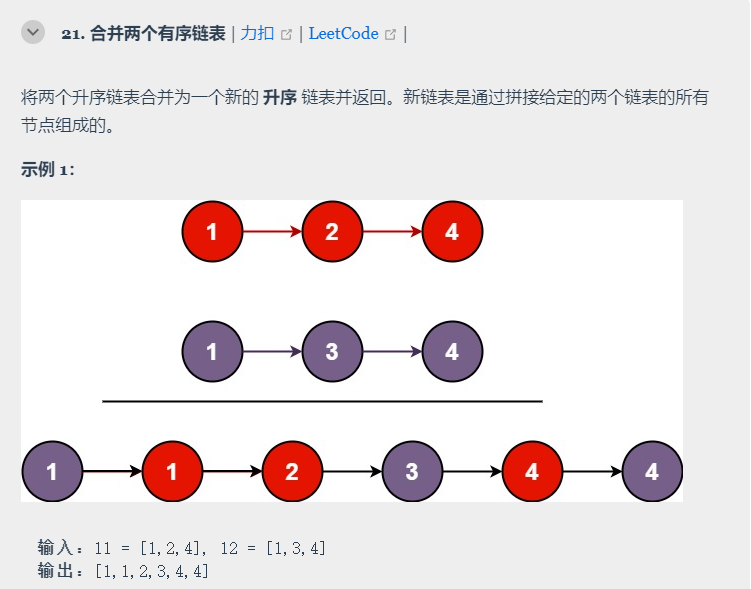

In [399]:
'''
要求：
给定两个有序链表，将他们合成为另一个大的有序链表

经验总结：
1. 当比较两边的元素的时候，因为是从小到大排列，所以反而是要把小的先加进去
2. 不管是在排序的过程中，在最后打印的过程中也不要忘了每打一个就让指针前进一个
3. **之所以不能直接让p = ListNode(-1)还要费事让dummy先等于的原因是：
    1) 避免处理指针为空的情况，反正一开始都从要一个虚拟的节点开始接，大不了下一个就是None
    2) 我们最后返回的应当是头节点，这样才能一步一步打出来，不然直接返回p的话反而会得到最后一个节点

* 当你需要创造一条新链表的时候，可以使用虚拟头结点简化边界情况的处理。
'''

def merge_two_lists(listNode1, listNode2):
    # 虚拟头节点
    dummy = ListNode(-1)
    p = dummy
    p1 = listNode1
    p2 = listNode2

    # 只要都还没到头
    while p1 and p2:
        # 每次接入较小的指针

        # p1大，那就把p2加进去，p2往前走一个
        if p1.val > p2.val:
            p.next = p2
            p2 = p2.next
        else:
            p.next = p1
            p1 = p1.next
        # 最后加完了p往前走一个
        p = p.next

    # 要是P1还有剩下的，就直接把剩下的所有接到p后面
    if p1:
        p.next = p1

    # 要是P2还有剩下的，就直接把剩下的所有接到p后面
    if p2:
        p.next = p2

    # 去掉第一个随便设置的节点
    return dummy.next

p = merge_two_lists(listNode1, listNode2)

while p:
    print(p.val, end = '->')
    p = p.next
print('None')

1->1->2->3->4->4->None


# 86.单链表的分解

In [400]:
list1 = LinkedList()

list1.append(1)
list1.append(4)
list1.append(3)
list1.append(2)
list1.append(5)
list1.append(2)

list1.print_list()

head = list1.get_head()

x = 3

1->4->3->2->5->2->None


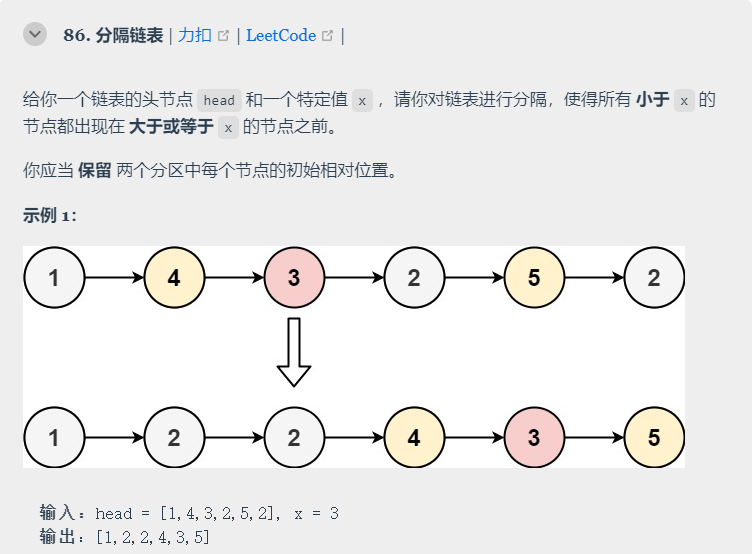

In [401]:
'''
要求：
给定一个链表的头节点head和一个特定值x，要求对联表进行分隔，使得所有小于x的节点都出现大于或等于x的节点之前
同时要保持相对位置

经验总结：
1. 由于我们直接操作了原本的链表(p)，因此我们需要切断以防止链表互相缠绕
2. 另一种方法是，每次添加新的node的时候，比起直接在原链表操作，我们可以直接创建新的node实例，这样做：
    1) 操作更简单，不用管什么切断
    2）**更消耗空间，创建了更多新的节点
'''

def partition(head, x):

    # 创建两个小链表，一个保存小于x的，一个保存大于等于x的
    # 小
    dummy1 = ListNode(-1)
    # 大于等于
    dummy2 = ListNode(-1)

    # 额外的指针用来分别生成两个小链表（指向头节点的指针不想丢失）
    p1, p2 = dummy1, dummy2

    # 最后定义用来遍历原链表的指针
    p = head

    # 根据规则分别使小链表的下一个指向原链表中的节点
    while p:
        if p.val < x:
            p1.next = p
            p1 = p1.next
        else:
            p2.next = p
            p2 = p2.next

        # 连接成功过后，由于原链表的节点还有可能会连着后面的节点，此时应当使此节点与后续节点断开连接
        
        # 首先找一个临时指针指向下一个节点
        temp = p.next

        # 此时可以放心地切断p和p下一个（temp）的链接，无需担心找不到p的下一个
        p.next = None

        # 由于还需要p作为指针遍历，所以将p付给temp所指的地址
        p = temp

    # 循环结束后，连接两个链表， 小的后面接大的
    p1.next = dummy2.next

    return dummy1.next

p = partition(head, x)

while p:
    print(p.val, end = '->')
    p = p.next
print('None')

1->2->2->4->3->5->None


# 23.合并k个升序链表

In [402]:
'''
优先队列 （最小堆）

功能：始终保持最小的元素位于树根（可通过全元素取负变相达到最大堆效果）
标准库：heapq

********
压入元组
当你向heapq中压入元组时，元组的比较将按照元素的顺序进行。首先比较元组的第一个元素，如果第一个元素相同，就比较第二个元素，依此类推。这意味着你可以通过将比较键放在元组的第一个位置来控制堆的排序行为。

压入列表
理论上，你也可以向heapq中压入列表，但前提是列表之间可以进行比较。列表的比较逻辑与元组类似，也是逐元素比较。然而，通常不推荐将列表用作heapq中的元素，因为列表通常用于表示集合数据，而元组用于表示有序数据，更适合用作排序的键。

压入自定义对象
当压入自定义对象时，heapq会使用Python的比较运算符来比较这些对象。如果你在类定义中实现了__lt__方法，heapq会使用这个方法来比较对象。实际上，Python排序和比较的机制要求你至少实现__lt__方法来进行比较。

如果你的自定义对象实现了__lt__方法，那么heapq就可以正常工作。
如果没有实现__lt__或其他比较方法，且尝试比较对象时，Python会抛出TypeError异常，因为它不知道如何比较这些对象。
'''

import heapq

# 功能1：将一个列表转换为堆
l = [3, 6, 1, 6, 9, 2, 5, 10, 5]
heapq.heapify(l)

print('测试弹出功能...')
# 功能2：弹出最小值，保持堆的不变性
min_val = heapq.heappop(l)
print('当前的最小值为: {}'.format(min_val))

min_val = heapq.heappop(l)
print('当前的最小值为: {}'.format(min_val))

min_val = heapq.heappop(l)
print('当前的最小值为: {}'.format(min_val))

min_val = heapq.heappop(l)
print('当前的最小值为: {}'.format(min_val))

print('\n')

print('测试先压再弹功能...')
# 功能3：先压入一个值，再弹出最小值，保持堆的不变性
min_val = heapq.heappushpop(l, -1)
print('当前的最小值为: {}，本轮压入了-1'.format(min_val))

min_val = heapq.heappushpop(l, -99)
print('当前的最小值为: {}，本轮压入了-99'.format(min_val))

min_val = heapq.heappushpop(l, 100)
print('当前的最小值为: {}，本轮压入了100'.format(min_val))

print('\n')

print('测试先弹再压功能...')
# 功能3：先压入一个值，再弹出最小值，保持堆的不变性
min_val = heapq.heapreplace(l, -1)
print('当前的最小值为: {}，本轮压入了-1'.format(min_val))

min_val = heapq.heapreplace(l, -99)
print('当前的最小值为: {}，本轮压入了-99'.format(min_val))

min_val = heapq.heapreplace(l, 100)
print('当前的最小值为: {}，本轮压入了100'.format(min_val))

测试弹出功能...
当前的最小值为: 1
当前的最小值为: 2
当前的最小值为: 3
当前的最小值为: 5


测试先压再弹功能...
当前的最小值为: -1，本轮压入了-1
当前的最小值为: -99，本轮压入了-99
当前的最小值为: 5，本轮压入了100


测试先弹再压功能...
当前的最小值为: 6，本轮压入了-1
当前的最小值为: -1，本轮压入了-99
当前的最小值为: -99，本轮压入了100


In [403]:
list1 = LinkedList()
list2 = LinkedList()
list3 = LinkedList()

list1.append(1)
list1.append(4)
list1.append(5)

list2.append(1)
list2.append(3)
list2.append(4)

list3.append(2)
list3.append(6)

list1.print_list()
list2.print_list()
list3.print_list()

listNode1 = list1.get_head()
listNode2 = list2.get_head()
listNode3 = list3.get_head()

lists = [listNode1, listNode2, listNode3]

1->4->5->None
1->3->4->None
2->6->None


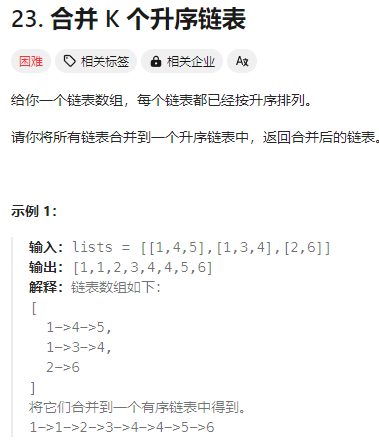

In [404]:
'''
由于此时不再只是合并两个升序链表，就没法方便地知道k个值里面哪一个最小了，但本质上我们也是想从k个链表里依次找到最小的接到我们自己的结果链表中，所以最好的办法是使用优先队列，然后将所有的值全部压进去，再依次取出最小值

经验总结：
如果只是传入元组（节点值，节点）会出现一个问题，就是当比较的双方的节点值相同时，heap会尝试比较下一个元组中的元素来维持堆结构，但如果不做任何操作，ListNode对象是不可比较的
由此，解决方法为在ListNode类中实现魔法方法__lt__（less than），这样此类便成为了一个可比较对象
'''

def merge_k_lists(lists):
    # 列表为空，自然也没有链表
    if not lists:
        return None
    
    # 定义优先级队列
    min_heap = []

    for head in lists:
        while head:
            # 每次我们直接压入元组（head的值和head这个节点，这样避免了空间的浪费，且值会用来维持堆结构）
            heapq.heappush(min_heap, (head.val, head))
            head = head.next

    # 现在所有值都已经在堆里了，由于返回的需要是一个链表，由此我们可以先定义一个虚拟头节点，然后依次从堆中取最小值对应的节点连接到此虚拟头节点之后
    dummy = ListNode(-1)
    p = dummy

    while min_heap:
        p.next = heapq.heappop(min_heap)[1]
        p = p.next

    return dummy.next

p = merge_k_lists(lists)

while p:
    print(p.val, end = '->')
    p = p.next
print('None')

1->1->2->3->4->4->5->6->None


# 19.删除单链表的倒数第n个节点

In [405]:
list1 = LinkedList()

list1.append(1)
list1.append(2)
list1.append(3)
list1.append(4)
list1.append(5)

list1.print_list()

head = list1.get_head()

n = 2

1->2->3->4->5->None


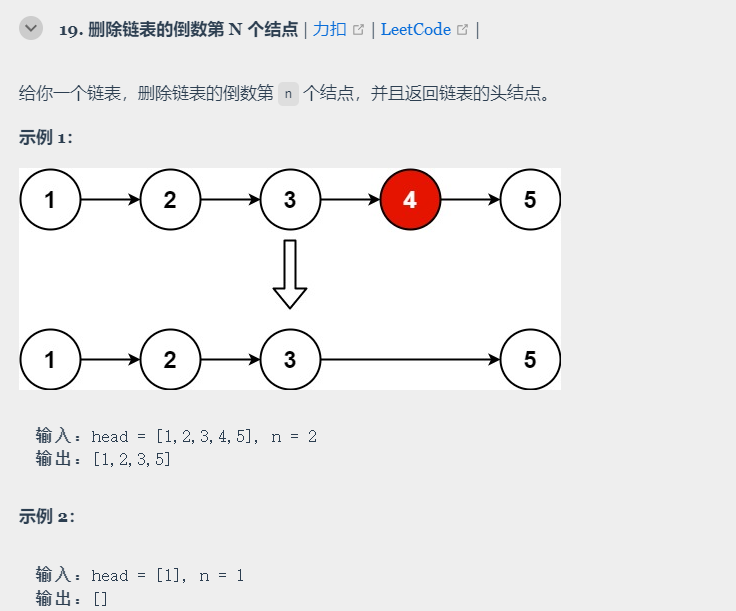

In [406]:
'''
由于我们无法得到链表的总长度，所以想要得到总长度再从头找到倒数第k个元素(访问第length-n+1索引处)的节点必须遍历链表两遍

如何只遍历一次？
- 我们先让第一个指针从头走n步，然后与此同时，再让另一个指针指向链表头，这样当第一个指针走到链表尾None时，前一个指针刚好走到了倒数第n个元素

经验总结：
1. 一个技巧是，用以上的方法，两个指针的间隔刚好就是n，这样等一个到头的时候，第二个刚好也就到倒数第n个位置
2. 想要删除一个链表中的节点，需要想办法得到它的上一个节点，只是拿到要删除的这个节点是无法把它删掉的，所以比起直接得到要删的位置，实际上应该得到最前面的位置
3. 实际上并不需要担心添加虚拟节点后需不需要变换长度，因为反正到的都是‘倒数’第n个
'''

def find_n_from_end(head, n):
    p1 = head
    p2 = head
    # 先让p1走n步
    for _ in range(n):
        p1 = p1.next

    # 只要p1还没走到头
    while p1:
        p1 = p1.next
        p2 = p2.next

    return p2

def removeNthFromEnd(head: ListNode, n: int) -> ListNode:
    # 虚拟头结点
    dummy = ListNode(-1)
    dummy.next = head
    # 删除倒数第 n 个，要先找倒数第 n + 1 个节点
    x = find_n_from_end(dummy, n + 1)
    # 删掉倒数第 n 个节点
    x.next = x.next.next
    return dummy.next

p = removeNthFromEnd(head, n)

while p:
    print(p.val, end = '->')
    p = p.next
print('None')

1->2->3->5->None


# 876. 链表的中间节点

In [407]:
list1 = LinkedList()

list1.append(1)
list1.append(2)
list1.append(3)
list1.append(4)
list1.append(5)
list1.append(6)

list1.print_list()

head = list1.get_head()

1->2->3->4->5->6->None


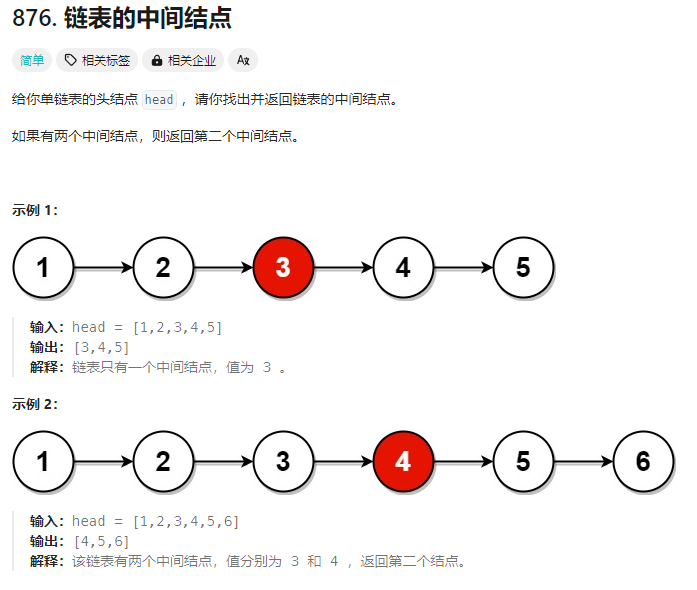

In [408]:
'''
和寻找倒数第k个节点思路相同，此时我们让快指针一次走两步，慢指针一次走一步，这样当快指针到None时，刚好快指针在中点
'''

def middle_node(head):
    p1 = head
    p2 = head

    while p1 and p1.next:
        p1 = p1.next.next
        p2 = p2.next

    return p2

p = middle_node(head)

print(p.val)

4


# 141. 环形链表

In [409]:
head = ListNode(3)
n1 = ListNode(2)
n2 = ListNode(0)
n3 = ListNode(-4)

head.next = n1
n1.next = n2
n2.next = n3
n3.next = n1

n4 = ListNode(1)

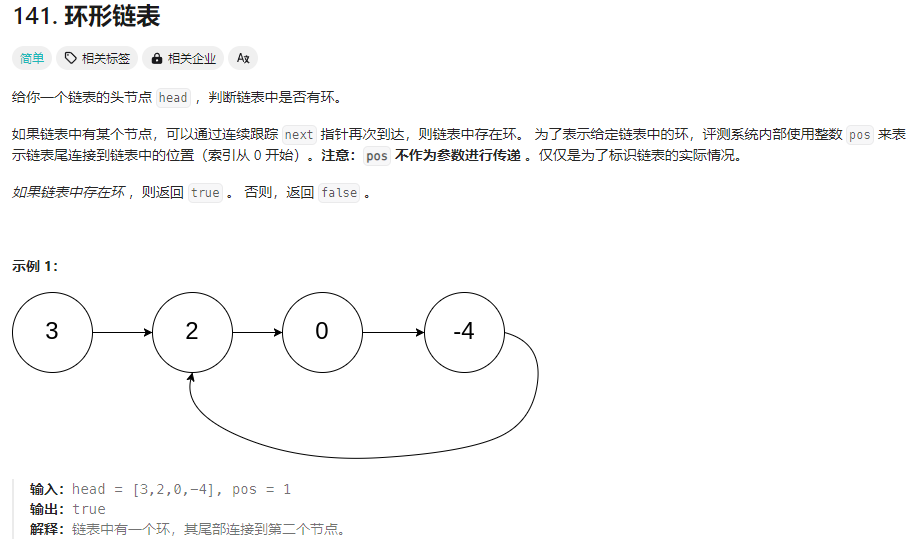

In [410]:
def has_cycle(head):
    slow = head
    fast = head

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

        if slow == fast:
            return True
    
    return False

print(has_cycle(head))
print(has_cycle(n4))

True
False


# 142. 环形链表 II

In [411]:
head = ListNode(3)
n1 = ListNode(2)
n2 = ListNode(0)
n3 = ListNode(-4)

head.next = n1
n1.next = n2
n2.next = n3
n3.next = n1

n4 = ListNode(1)

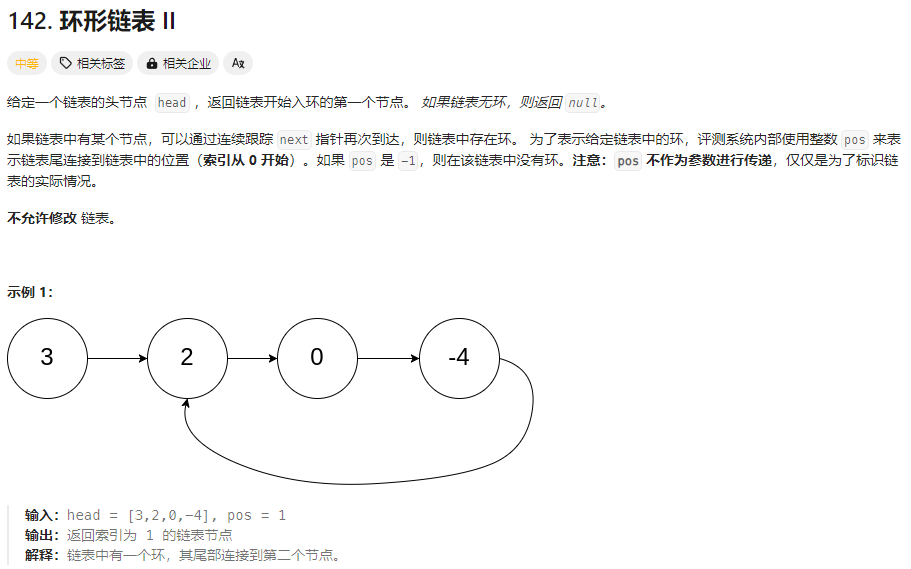

In [412]:
def detect_cycle(head):
    slow = head
    fast = head

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

        if slow == fast:
            break
    
    # 因为不知道是因为快慢指针相遇退出去的还是因为循环条件为假退出去的，需要额外判断
    if (not fast) or (not fast.next):
        # 碰到空指针说明没环
        return None
    
    # 以下运算之所以合理是因为数学原因，请参考资源
    slow = head
    # 快慢指针同步前进，相交处即为环的起点
    while slow != fast:
        fast = fast.next
        slow = slow.next
    
    return slow


print(detect_cycle(head).val)
print(detect_cycle(n4))

2
None


# 160. 相交链表

In [413]:
head1 = ListNode(4)
n1 = ListNode(1)
head2 = ListNode(5)
n2 = ListNode(6)
n3 = ListNode(1)

n4 = ListNode(8)

n5 = ListNode(4)
n6 = ListNode(5)

head1.next = n1
n1.next = n4

head2.next = n2
n2.next = n3
n3.next = n4

n4.next = n5
n5.next = n6

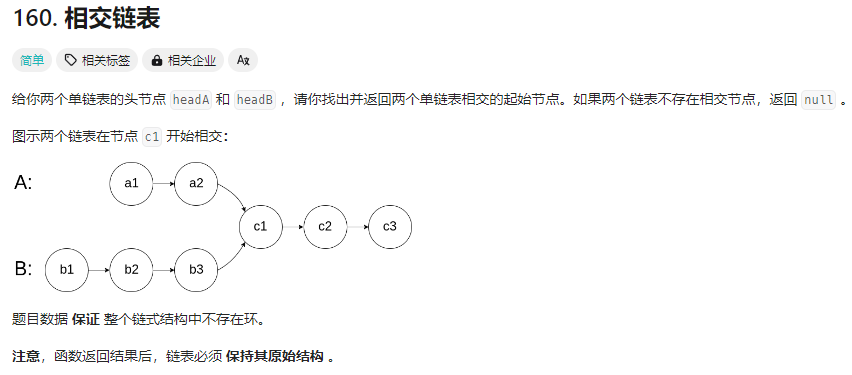
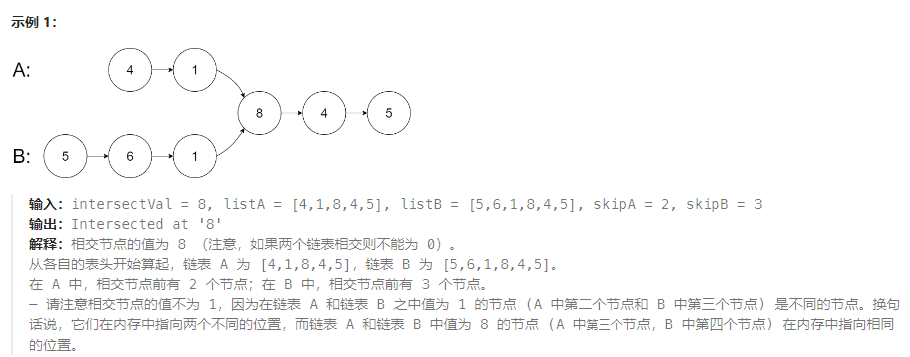

In [414]:
'''
思路是，之所以没法用双指针简单的一步一步走的原因就在于两个链表在相交之前是错位的，这样一直next无论如何也碰不到一起，那有没有办法把两个链表在交点之前的长度变得一样长？
'''

'\n思路是，之所以没法用双指针简单的一步一步走的原因就在于两个链表在相交之前是错位的，这样一直next无论如何也碰不到一起，那有没有办法把两个链表在交点之前的长度变得一样长？\n'

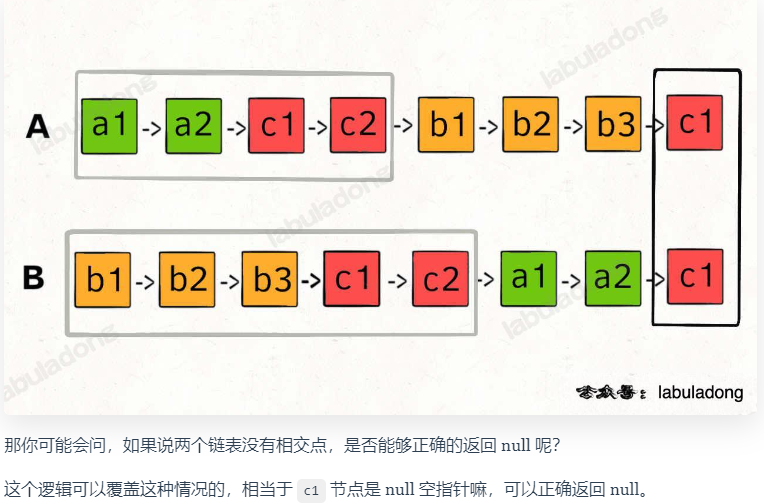

In [415]:
def get_intersection_node(head1, head2):
    p1, p2 = head1, head2

    # 按照以上的设计，他们一定会相遇，即使他们不相交，最终指向的None也是同一个地址
    while p1 != p2:
        if p1 == None:
            p1 = head2
        else:
            p1 = p1.next

        if p2 == None:
            p2 = head1
        else:
            p2 =p2.next

    return p1
    
print(get_intersection_node(head1, head2).val)

8
